# [Tractography](https://onlinelibrary.wiley.com/doi/10.1002/jmri.27188)



<p align='center'>
  <img src ="images/TractographOverview.jpg" alt='probtrack' width=500/>
</p>

<pre>



</pre>


<p align='center'>
  <img src ="images/TractographyScheme.jpg" alt='probtrack' width=500/>
</p>




In [3]:
# Set seed 
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np 

# This is where I keep the data locally.
# All data for these workshops can be found in the Box folder.
# https://rochester.box.com/s/91t2eb0neym1zolozqml11tejikrb8kz 

%cd /Users/afinkelstein/Documents/Projects/Data

/Users/afinkelstein/Documents/Projects/Data


## [Anatomically Constrained Tractography](https://www.sciencedirect.com/science/article/pii/S1053811912005824)

To further improve the biological plausbility of tractography algorithms, ACT uses a priori constraints to define starting and stopping criteria for streamlines. These assumptions ensure that streamlines terminate at the GM/WM interface or deep subcortical gray matter, they do NOT terminate in the middle of the white matter or the middle of the CSF. Notably, this does not mean that streamlines which meet these criteria are necessarily true streamlines (False Positives). False positives will be dealth with later. 

To perform ACT in mrtrix we will need a tissue segmentation to provide anatomical priors. From these anatomical priors we will also define the GMWM interface (gmwmi) which will serve as our seed for tractography. Individual ROIs can also serve as seeds, however in this workshop we are reviewing whole brain tractograms. Streamlines related to a specific ROI can also be obtained after whole brain tractography. 

[Overview of Code](https://mrtrix.readthedocs.io/en/dev/quantitative_structural_connectivity/act.html) 

<p align='center'>
  <img src ="images/ACTOverview.jpg" alt='fodf' width=500/>
</p>



<p align='center'>
  <img src ="images/ACTexample.jpg" alt='fodf' width=300/>
</p>




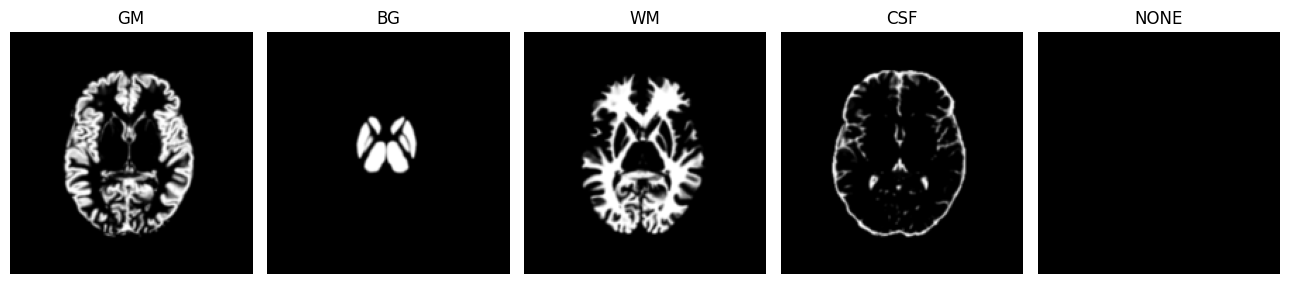

In [14]:
# Run 5ttgen or FAST in FSL to segment tissues. 

img = nib.load('5tt_coreg.nii.gz').get_fdata()
plt.figure(figsize=(13,13))
tissues = ['GM', 'BG', 'WM', 'CSF', 'NONE']
for i in range(img.shape[-1]):
    plt.subplot(1,5,i+1)
    plt.imshow(np.rot90(img[:,:,50, i]), cmap='gray')
    plt.title(tissues[i])
    plt.axis('off')
plt.tight_layout()

In [11]:
#Create GM/WM interface 

# 5tt2gmwmi 5tt_coreg.nii.gz gmwmSeed_coreg.mif

!mrview gmwmSeed_coreg.mif

## Effect of Applying Anatomical Constraints

<p align='center'>
  <img src ="images/ACTEffects.jpg" alt='probtrack' width=500/>
</p>


Yellow spheres indicate the streamline endpoints. We see that when anatomical constraints (ACT) is not applied streamlines tend to end more often within the white matter and CSF (not shown). ACT provides more bioloigcally plausible endpoints for streamlines, increasing the biological relevance of downstream analyses (i.e., connectivity). 


## [Probabilistic Tractography](https://mrtrix.readthedocs.io/en/dev/reference/commands/tckgen.html)

In deterministic tracrography, the direction of the streamline at each voxel is determined just based on the predominant fiber orientation. Probabilistic tractography samples a distriction. Multiple streamlines are sampled from a seed region, akin to a monte carlo simulation. Probabilistic tractography, along with backtrack is able to better able correct for crossing fiber populations (not dominated by predominant fiber orientation) and premature termination of streamlines. 

<p align='center'>
  <img src ="images/probtracks.png" alt='probtrack' width=500/>
</p>



In [15]:
#tckgen -act 5tt_coreg.mif -backtrack -seed_gmwmi gmwmSeed_coreg.mif -nthreads 8 -maxlength 250 -cutoff 0.06 -select 10000000 wmfod_norm.mif tracks_10M.tck

# can also use fixel based algorithms, FOD amplitude or tensor FA for tckgen
# Various tracking algorithms as well. Default is iFOD2 - which is a probabilistic algorithm. 

## [Spherical Deconvolution Informed Filtering of Tractograms - SIFT ](https://mrtrix.readthedocs.io/en/dev/reference/commands/tcksift.html)

You have now created a tractogram for a single subject. Various methods have been developed to filter false positive streamlines and improve the quantitative nature and biological plausbiility of tractograms, prior to down-stream analysis. SIFT ensures that the streamline densities are proportional the the fiber densities as estimated by CSD through the white matter, thereby ensuring streamlines between two regions are an estimate of the cross-sectional area of the fibers connecting the two regions. 


<p align='center'>
  <img src ="images/SIFT.jpg" alt='probtrack' width=500/>
</p>


Here we see for the red streamline, that the streamline densities exceed the FOD lobe integrals, removing the streamline would reduce the difference, thereby reducing the cost function and improving the model fit. Conversely for the cyan streamline, removing this streamline would increase the gradient, and the cost function, worsening the model fit. 

Other filtering techniques exist as well - termed microstructure-informed tractogram progessing. In these instances the the contribution of streamlines to the MRI signal is modulated by incorporating the observed MRI signal (e.g. using the apparent fiber density (AFD)), further improving the biological relevance of tractograms. 

[COMMIT](https://ieeexplore.ieee.org/abstract/document/6884830/) 

<p align='center'>
  <img src ="images/COMMIT.gif" alt='probtrack' width=500/>
</p>

<pre>


</pre> 


<p align='center'>
  <img src ="images/TractFiltering.jpg" alt='probtrack' width=600/>
</p>




In [10]:
!mrview T1_coreg_diff.nii.gz -tractography.load smallerTracks_200k.tck -plane 0 -mode 3 -imagevisible false

You now have your tractogram and can go generate a SC matrix.